<div style="background:#E9FFF6; color:#440404; padding:8px; border-radius: 4px; text-align: center; font-weight: 500;">IFN619 - Data Analytics for Strategic Decision Makers (2023_sem1)</div>

# IFN619 :: A2-DataAnalyticsCycle - tutorial exercises

## QUESTION

**Concern:** A key concern of many Queensland organisations and businesses is the impact of climate change on the coral and other marine life at the Great Barrier Reef. 
One indication of climate change is the rise in sea level. The [State of the Environment](https://www.stateoftheenvironment.des.qld.gov.au/climate/coasts-oceans/sea-level) report provides information on this indicator.

> **Question:** To what extent have changes in sea level been observed in the area of the Great Barrier Reef?

In this exercise, you will investigate history data on sea levels in two sites within the Great Barrier Reef. 

## DATA

Historic sea level data from within the Great Barrier Reef is available from [Queensland Government Open Data Portal](https://www.data.qld.gov.au/dataset/soe2020-sea-level/resource/2020-indicator-4-2-0-4)
1. Download the data as a CSV file, and save as `indicator-4-2-0-4.csv` in your `data` folder
2. Look at the contents of the file to understand the data. Note: the data instructions on the webpage provide some useful description of the data. 
3. Import the data as a `pandas` dataframe.

In [4]:
# Import pandas library
import pandas as pd

In [6]:
# Read a CSV into a dataframe
file_path = "data/"
file_name = "indicator-4-2-0-4.csv"
df = pd.read_csv(f"{file_path}{file_name}")
df

,Year,Month,Cape Ferguson,Rosslyn Bay,Global
0,1996,1,60.0,73,0.0
1,1996,2,115.0,145,-0.3
2,1996,3,132.0,89,3.7
3,1996,4,2.0,40,2.9
4,1996,5,26.0,56,4.8
...,...,...,...,...,...
285,2019,10,19.0,44,90.7
286,2019,11,13.0,18,90.8
287,2019,12,90.0,111,NaN
288,2020,1,127.0,125,NaN


## ANALYSIS

If we were to view all data including months we would be able to see the seasonality (as mentioned in the report). However, as we are just interested in the overall trend, we can get the mean change for the year. We can do this with the `groupby()` and `mean()` functions.

However, first we need to clean the data. Because 2020 is incomplete (doesn't have 12 months), it could skew any averages by reflecting only the seasonal variation for January and February. Therefore, we'll drop 2020 from the data BEFORE calculating the means. We can do this by *filtering* the dataframe to only include years before 2020.

In [30]:
# Remove incomplete 2020 data by selecting only years before 2020
clean_df = df[df['Year']<2020]
clean_df

,Year,Month,Cape Ferguson,Rosslyn Bay,Global,Day,Date
0,1996,1,60.0,73,0.0,1,1996-01
1,1996,2,115.0,145,-0.3,1,1996-02
2,1996,3,132.0,89,3.7,1,1996-03
3,1996,4,2.0,40,2.9,1,1996-04
4,1996,5,26.0,56,4.8,1,1996-05
...,...,...,...,...,...,...,...
283,2019,8,35.0,49,92.2,1,2019-08
284,2019,9,10.0,25,91.6,1,2019-09
285,2019,10,19.0,44,90.7,1,2019-10
286,2019,11,13.0,18,90.8,1,2019-11


In [31]:
# Calculate the means for the year with groupby() and mean()
mean_cols = ['Cape Ferguson','Rosslyn Bay', 'Global']
mean_df = clean_df.groupby('Year')[mean_cols].mean()
mean_df

,Cape Ferguson,Rosslyn Bay,Global
Year,,,
1996,-11.083333,7.833333,4.400000
1997,-21.666667,-7.750000,8.950000
1998,52.250000,43.250000,14.466667
1999,53.166667,61.416667,14.583333
2000,51.916667,40.166667,17.908333
2001,26.500000,36.250000,22.491667
2002,4.416667,15.916667,25.975000
2003,17.958333,34.750000,28.158333
2004,-8.833333,3.000000,30.216667


## VISUALISATION

<AxesSubplot: xlabel='Year'>

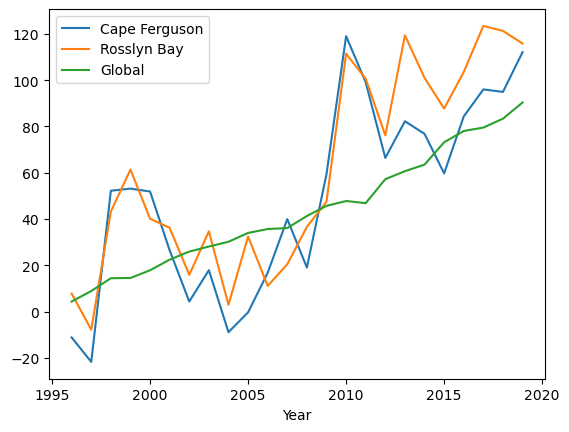

In [32]:
mean_df.plot()

## INSIGHTS

- What patterns did you find? 
- What is the recommendation for the concern?
- What other information would be helpful?
- What doesn't the data tell us?
- Can we make inferences?

---
# Additional Exercises
---

## Research Data Example - Questions & Data

The data from this exercise are from this [published research article](https://www.nature.com/articles/s41598-020-59810-w). Research questions based on these data might be useful for clinicians who need to diagnose and treat people with Parkinson's diesase. 

> Roeder, L., Boonstra, T.W. & Kerr, G.K. Corticomuscular control of walking in older people and people with Parkinson’s disease. Sci Rep 10, 2980 (2020).

1. Download the gait parameters data from [FigShare](https://figshare.com/articles/dataset/Outcome_measures_analyses_scripts_for_Corticomuscular_control_of_walking_in_older_people_and_people_with_Parkinson_s_disease_/7991276). 
2. Upload the CSV to your 'data' directory.
3. Load the data from the CSV into a dataframe
4. Identify questions that you might be able to answer from the data    
    
TIP: You may have to read parts of the article cited above. First, describe the "Group" and "condition" columns, then look at some of the other columns and come up with questions of interest.
    

In [33]:
# Import the required libraries
import pandas as pd

In [35]:
# Read the CSV into a dataframe
file_path = "data/"
file_name = "gait-parameters.csv"
df = pd.read_csv(f"{file_path}{file_name}")
df

,ID,Group,stridetime,steptime,stridetimevari,steptimevari,stance,swing,singlesupport,doublesupport,walkingspeed,condition
0,9,Young,0.993024,0.491199,0.014149,0.006650,0.598309,0.382241,0.382241,0.108122,,Overground
1,10,Young,1.016794,0.499340,0.010448,0.006654,0.614419,0.392729,0.392729,0.109445,,Overground
2,13,Young,1.130379,0.556973,0.017229,0.008993,0.694279,0.419148,0.419148,0.138193,,Overground
3,14,Young,1.101021,0.547437,0.013362,0.007141,0.696621,0.390765,0.390765,0.150087,3.77,Overground
4,15,Young,1.136368,0.556672,0.023620,0.010081,0.715648,0.399843,0.399843,0.157630,3.98,Overground
...,...,...,...,...,...,...,...,...,...,...,...,...
127,222,Parkinson,0.906446,0.437289,0.027089,0.010520,0.534758,0.366468,0.366468,0.082737,4,Treadmill
128,223,Parkinson,0.974302,0.487420,0.032397,0.013540,0.598683,0.360818,0.360818,0.122005,4.8,Treadmill
129,224,Parkinson,0.984825,0.472009,0.011853,0.007282,0.633884,0.343931,0.343931,0.144113,4,Treadmill
130,225,Parkinson,1.034038,0.517551,0.012301,0.008410,0.660246,0.370983,0.370983,0.142132,3.6,Treadmill


#### Example research questions: 

- What is the mean walking speed of the Parkinson's group, the healthy older group and the healthy younger group? 
- What is the mean duration of the swing phase (in seconds) of the Parkinson's group, the healthy older group and the healthy younger group? 
- Do people with Parkinson's disease walk faster on the treadmill compared to natural overground walking? 
- Do people with Parkinson's disease walk slower than healthy older people? Do they walk slower than healthy young people?
- Is the stride time variability different between healthy young, healty older and people with Parkinson's?





--- 
## Data Search Example

1. Look around on the web for some publicly available data that you can download in .csv format (e.g. https://catalog.data.gov/dataset/?res_format=CSV)
2. Once you have a file, write some code in a Jupyter notebook that will load the data into a pandas dataframe
3. For a numerical column, see if you can calculate some basic statistics like mean, standard deviation...

---
## Data Scraping Example

Sometimes the data you want isn't available as a simple .csv download. In these cases you might have to make your own .csv using an application like Microsoft Excel or Google Sheets. This is sometimes called "scraping" data.

1. Find a table of data on a web page (There are many on Wikipedia, for example)
2. Copy and paste the data (or some of the data) into a spreadsheet
3. Save the spreadsheet as a .csv file
4. Once you have the file, write some code in a Jupyter notebook that will load the data into a pandas dataframe
5. For a numerical column, see if you can calculate some basic statistics like mean, standard deviation...